# Lombrics results figures

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

## Importance

In [4]:
shap_df = pd.read_csv('results/shap_importance.csv',index_col=0)

In [52]:
feature_names = pd.read_csv('results/feature_names.csv',index_col=0)

In [58]:
shap_df['old_fname']=shap_df['fname']
shap_df['fname']=shap_df['fname'].apply(lambda x: feature_names.loc[x,'New_name']).tolist()

In [60]:
feature_order = shap_df[['fname','shap_phi']].groupby('fname').mean().sort_values(by='shap_phi',ascending=False).index

In [62]:
palette_colors = ["#8B0000","#006300","#D2691E","#CECECE","#1818C5","#13848C"]
palette_labels = ["landcover","physchem","structural","temperature","precipitation","hydro"]

feature_cmap = {k:v for k,v in zip(palette_labels,palette_colors)}

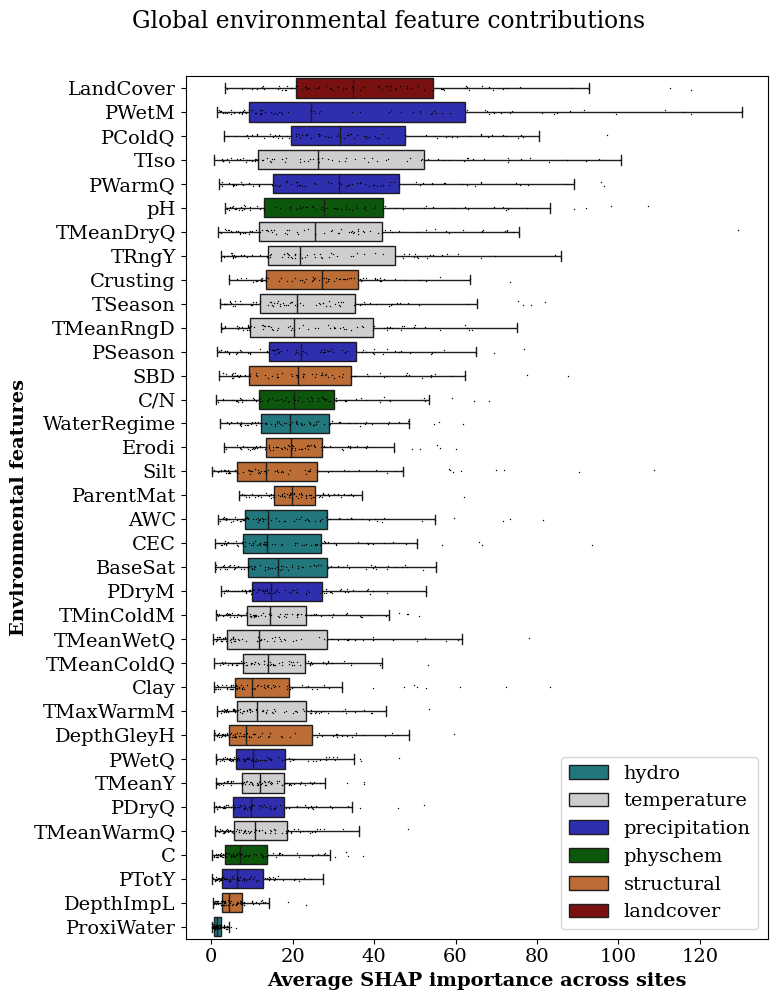

<Figure size 1200x1800 with 0 Axes>

In [64]:
# Set global font settings
mpl.rcParams.update({
    'font.size': 14,             # Default font size
    'font.family': 'serif',       # Use a serif font (Times New Roman-like)
    'axes.labelsize': 16,         # Font size for axis labels
    'axes.titlesize': 18,         # Font size for title
    'legend.fontsize': 14,        # Font size for legend
    'xtick.labelsize': 14,        # Font size for x-axis ticks
    'ytick.labelsize': 14,        # Font size for y-axis ticks
})

fig, ax = plt.subplots(1,1,figsize=(8,10))

# Plot boxplot with custom scatter (marker) settings
plt.figure(figsize=(4, 6), dpi=300)  # High resolution for clarity
sns.boxplot(data=shap_df,y='fname',x='shap_phi',hue='group',order=feature_order,showfliers=False,ax=ax,palette=feature_cmap)

# Overlay scatter plot for better visualization
sns.stripplot(data=shap_df, x="shap_phi", y="fname", order=feature_order, 
              color="black", size=1, jitter=True, ax=ax)  # Small black markers

# Labels and Title
ax.set_xlabel('Average SHAP importance across sites', fontsize=14, fontweight='bold')
ax.set_ylabel('Environmental features', fontsize=14, fontweight='bold')
fig.suptitle('Global environmental feature contributions',y=1.001)
fig.tight_layout()

In [125]:
var_part = shap_df.pivot_table(index='taxa',columns='fname',values='shap_phi',aggfunc='sum',fill_value=0)
var_part = var_part / var_part.sum(axis=1).values.reshape(-1,1)

In [138]:
feat2group = shap_df[['fname','group']].drop_duplicates().set_index('fname')['group']

In [126]:
species = var_part.index.tolist()

In [151]:
df_long = var_part.reset_index().melt(id_vars='taxa')
df_long['group']=feat2group.loc[df_long['fname'].tolist()].tolist()
df_long = df_long.drop('fname',axis=1).groupby(['taxa','group']).mean().reset_index()

In [159]:
df_wide = df_long.pivot_table(index='taxa',columns='group',values='value')
df_wide = df_wide / df_wide.sum(axis=1).values.reshape(-1,1)

Text(0.5, 1.0, 'SHAP variation partitioning')

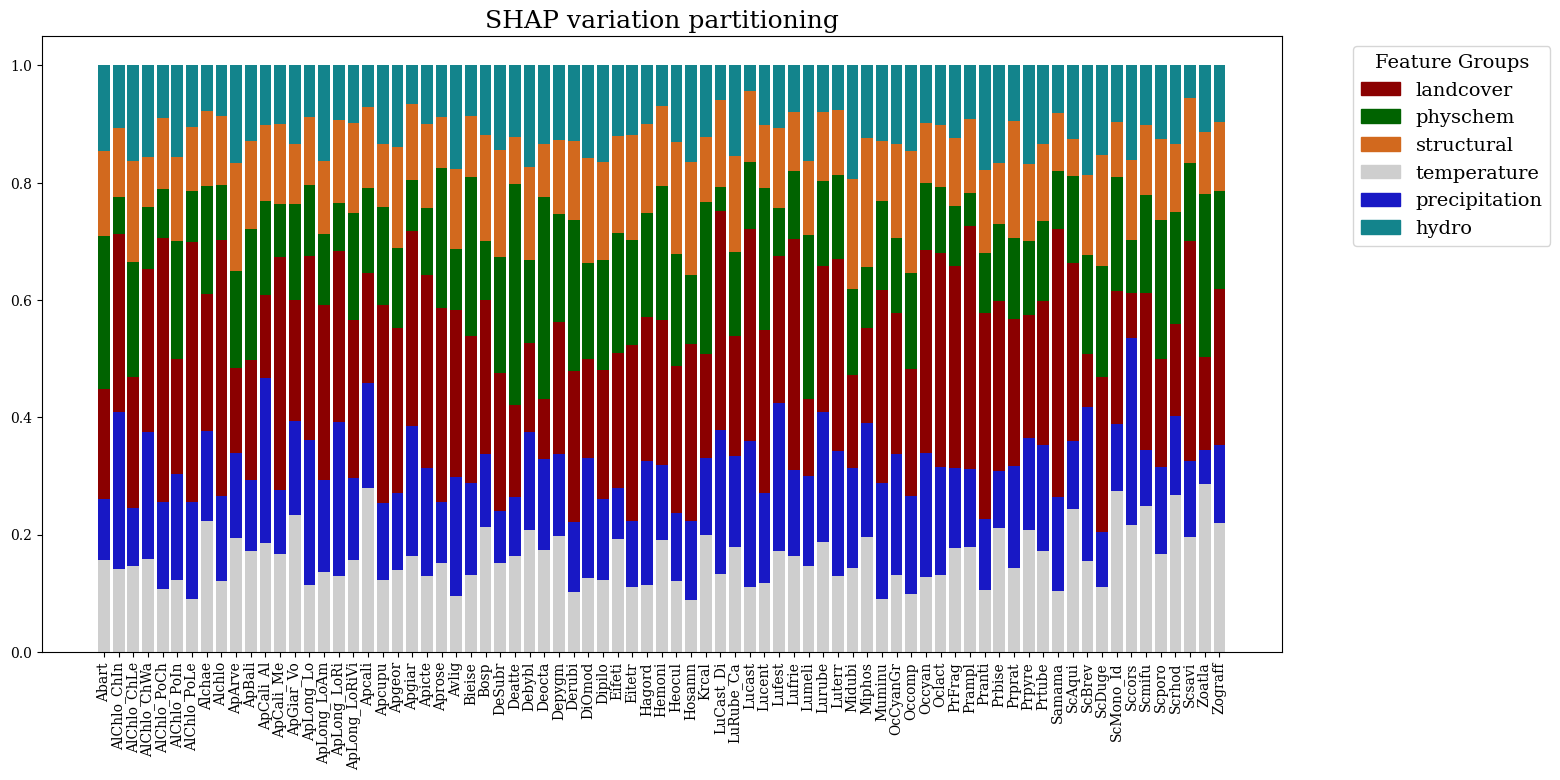

In [164]:
# Set global font settings
mpl.rcParams.update({
    'font.size': 14,             # Default font size
    'font.family': 'serif',       # Use a serif font (Times New Roman-like)
    'axes.labelsize': 16,         # Font size for axis labels
    'axes.titlesize': 18,         # Font size for title
    'legend.fontsize': 14,        # Font size for legend
    'xtick.labelsize': 10,        # Font size for x-axis ticks
    'ytick.labelsize': 10,        # Font size for y-axis ticks
})

#plt.bar(data=var_part.reset_index().melt(id_vars='taxa'),y='taxa',x='value',hue='group',palette=feature_cmap,stacked=True)
fig, ax = plt.subplots(figsize=(16, 8))

# Stacking bars manually
bottom = [0] * len(species)  # Start stacking from zero

for feature in ['temperature','precipitation','landcover','physchem','structural','hydro']:
    values = df_wide[feature]  # Extract values for each feature group
    ax.bar(species, values, label=feature, color=feature_cmap[feature], bottom=bottom)
    bottom = [i + j for i, j in zip(bottom, values)]  # Update bottom for stacking

# Manually create legend using patches
legend_patches = [mpatches.Patch(color=color, label=feature) for feature, color in feature_cmap.items()]
ax.legend(handles=legend_patches, title="Feature Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=90)
plt.title('SHAP variation partitioning')

In [ ]:
# Set global font settings
mpl.rcParams.update({
    'font.size': 14,             # Default font size
    'font.family': 'serif',       # Use a serif font (Times New Roman-like)
    'axes.labelsize': 16,         # Font size for axis labels
    'axes.titlesize': 18,         # Font size for title
    'legend.fontsize': 14,        # Font size for legend
    'xtick.labelsize': 14,        # Font size for x-axis ticks
    'ytick.labelsize': 14,        # Font size for y-axis ticks
})

fig, ax = plt.subplots(1,1,figsize=(8,10))

# Plot boxplot with custom scatter (marker) settings
plt.figure(figsize=(4, 6), dpi=300)  # High resolution for clarity
sns.barplot(data=shap_df,y='taxa',x='shap_phi',hue='group',order=feature_order,showfliers=False,ax=ax,palette=feature_cmap)

# Overlay scatter plot for better visualization
sns.stripplot(data=shap_df, x="shap_phi", y="fname", order=feature_order, 
              color="black", size=1, jitter=True, ax=ax)  # Small black markers

# Labels and Title
ax.set_xlabel('Average SHAP importance across sites', fontsize=14, fontweight='bold')
ax.set_ylabel('Environmental features', fontsize=14, fontweight='bold')
fig.suptitle('Global environmental feature contributions',y=1.001)
fig.tight_layout()

## Model comparison

In [3]:
perf_df = pd.read_csv('results/model_comparison.csv')

Text(0.5, 1.01, 'Effect of species prevalence on calibration predictive performances')

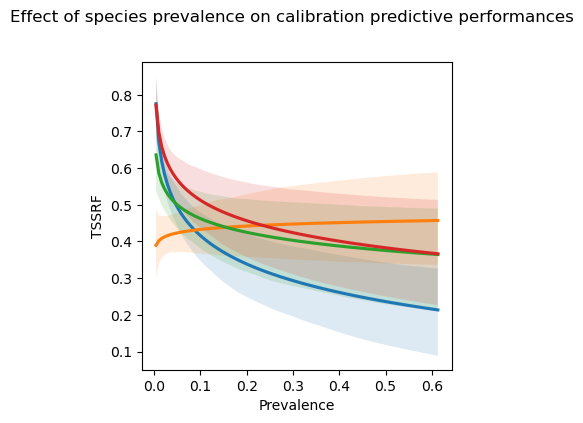

In [29]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSMTEC',logx=True,ax=ax,scatter=False)
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSGLM',logx=True,ax=ax,scatter=False)
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSGBM',logx=True,ax=ax,scatter=False)
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSRF',logx=True,ax=ax,scatter=False)
fig.suptitle('Effect of species prevalence on calibration predictive performances',y=1.01)
#fig.tight_layout()

Text(0.5, 1.01, 'Effect of species prevalence on predictive metrics')

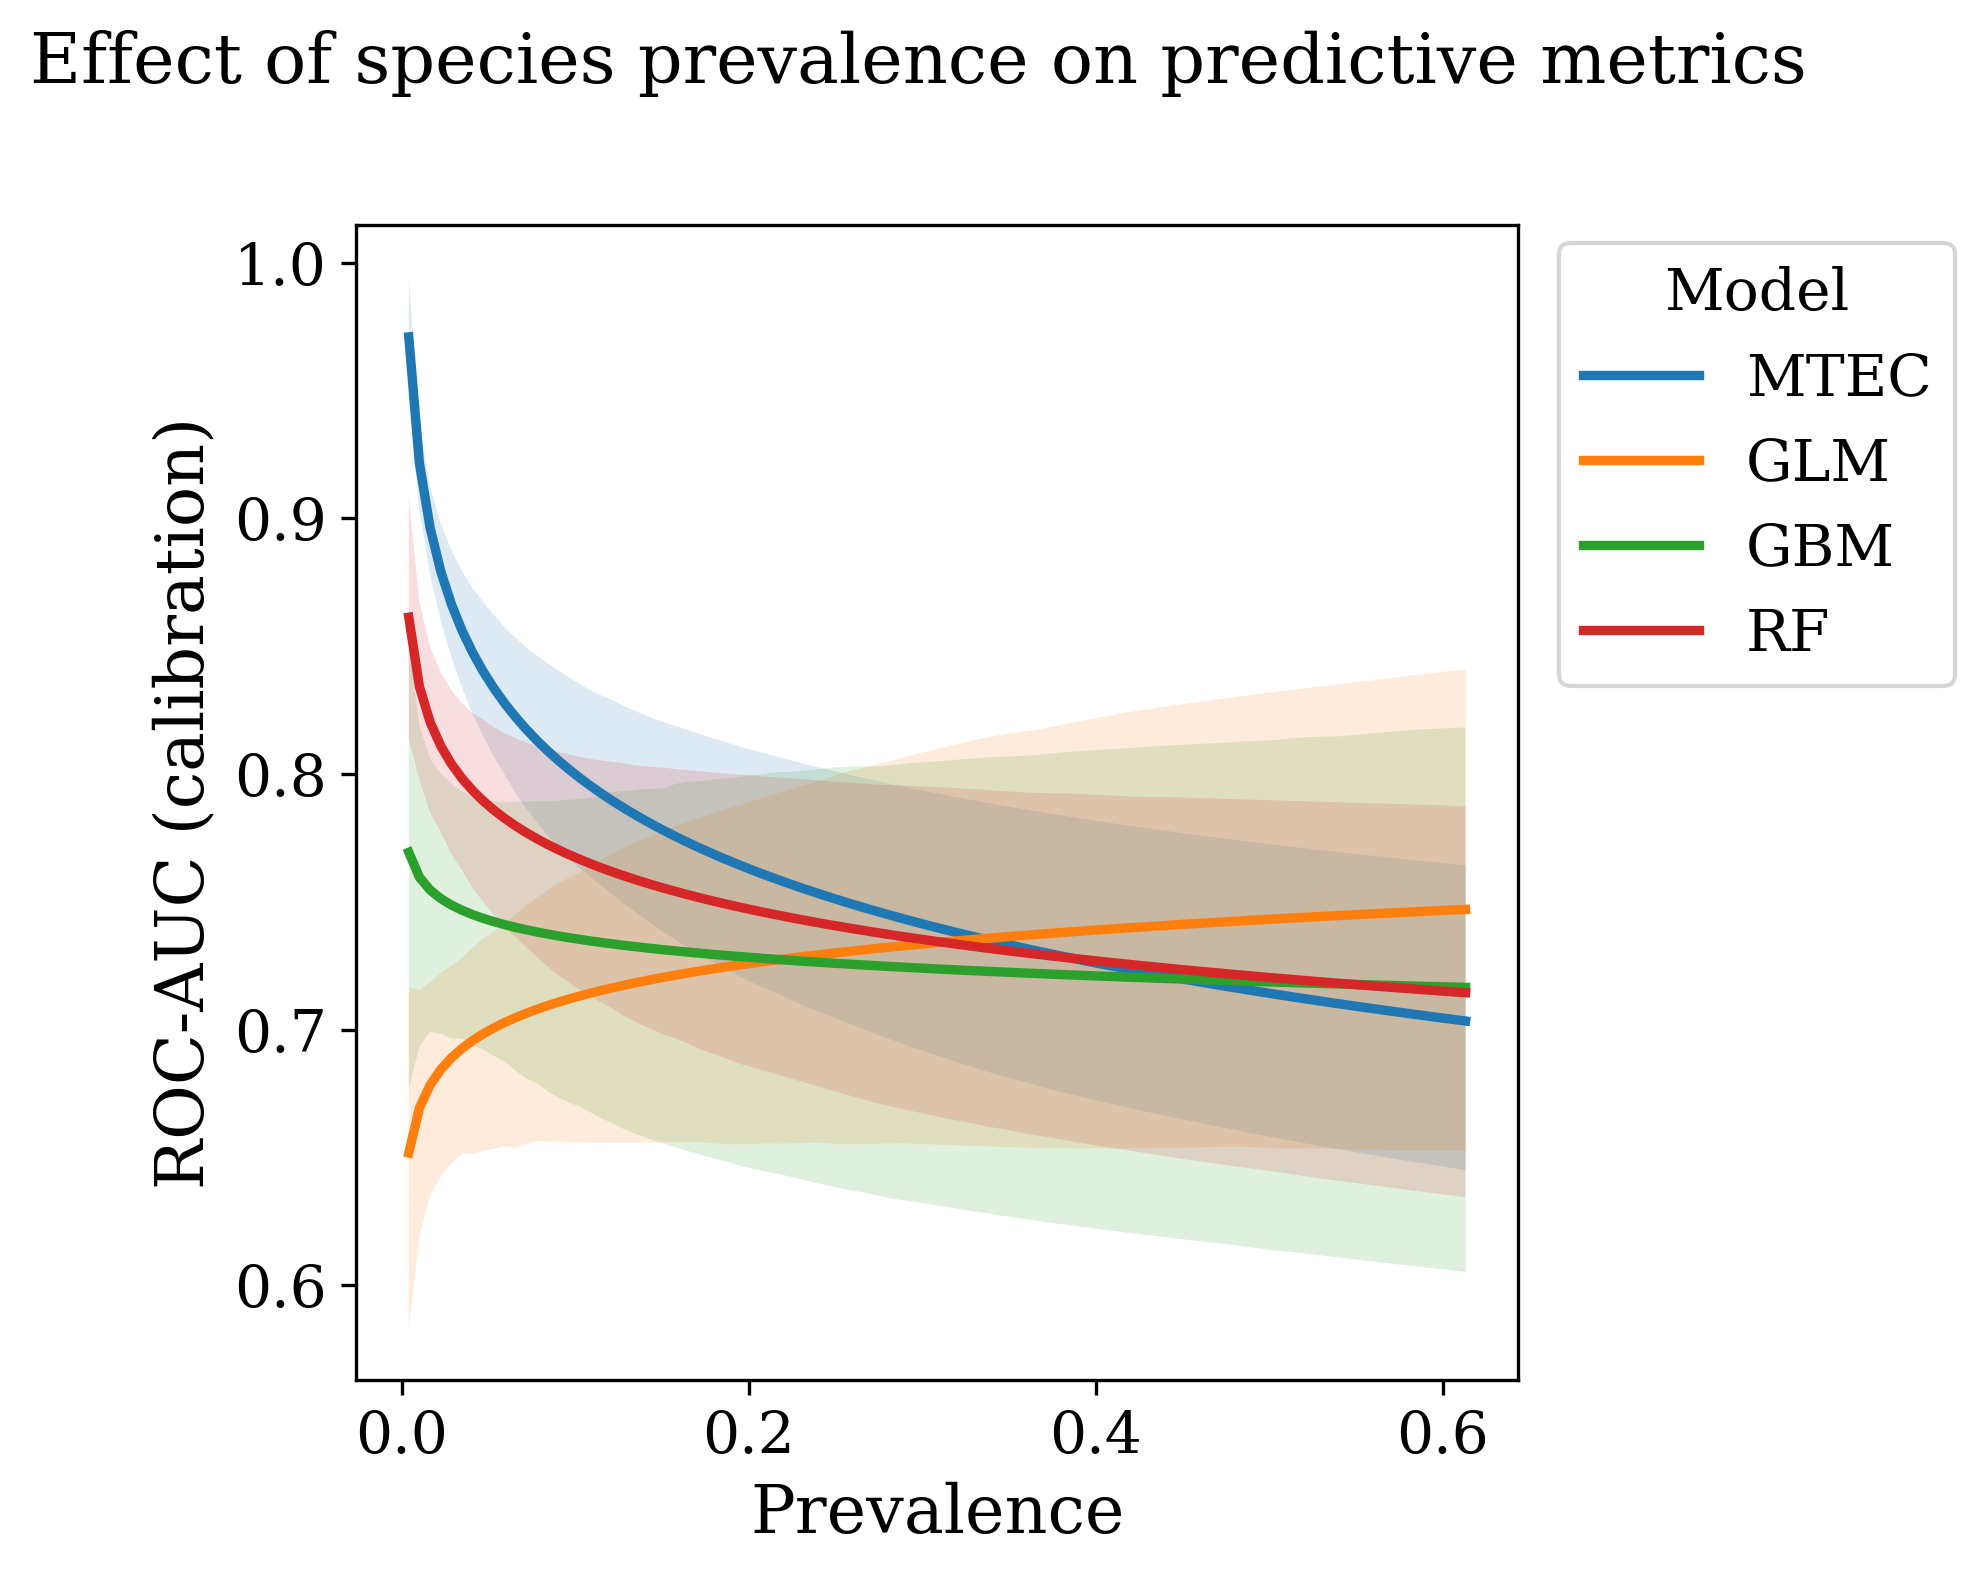

In [41]:
# Set global font settings
mpl.rcParams.update({
    'font.size': 14,             # Default font size
    'font.family': 'serif',       # Use a serif font (Times New Roman-like)
    'axes.labelsize': 16,         # Font size for axis labels
    'axes.titlesize': 18,         # Font size for title
    'legend.fontsize': 14,        # Font size for legend
    'xtick.labelsize': 14,        # Font size for x-axis ticks
    'ytick.labelsize': 14,        # Font size for y-axis ticks
})

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)  # Increase figure size & resolution
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCMTEC',logx=True,ax=ax,scatter=False,label='MTEC')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCGLM',logx=True,ax=ax,scatter=False,label='GLM')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCGBM',logx=True,ax=ax,scatter=False,label='GBM')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCRF',logx=True,ax=ax,scatter=False,label='RF')

# Add axis legend
ax.set_xlabel('Prevalence')
ax.set_ylabel('ROC-AUC (calibration)')

# Add legend
ax.legend(title="Model",bbox_to_anchor=(1.01,1.01))

fig.suptitle('Effect of species prevalence on predictive metrics',y=1.01)
#fig.tight_layout()

In [ ]:
# Set global font settings
mpl.rcParams.update({
    'font.size': 14,             # Default font size
    'font.family': 'serif',       # Use a serif font (Times New Roman-like)
    'axes.labelsize': 16,         # Font size for axis labels
    'axes.titlesize': 18,         # Font size for title
    'legend.fontsize': 14,        # Font size for legend
    'xtick.labelsize': 14,        # Font size for x-axis ticks
    'ytick.labelsize': 14,        # Font size for y-axis ticks
})

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)  # Increase figure size & resolution
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCMTEC',logx=True,ax=ax,scatter=False,label='MTEC')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCGLM',logx=True,ax=ax,scatter=False,label='GLM')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCGBM',logx=True,ax=ax,scatter=False,label='GBM')
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='AUCRF',logx=True,ax=ax,scatter=False,label='RF')

# Add axis legend
ax.set_xlabel('Prevalence')
ax.set_ylabel('ROC-AUC (calibration)')

# Add legend
ax.legend(title="Model",bbox_to_anchor=(1.01,1.01))

fig.suptitle('Effect of species prevalence on predictive metrics',y=1.01)
#fig.tight_layout()

Text(0.5, 1.0, 'Earthworm prevalence distribution')

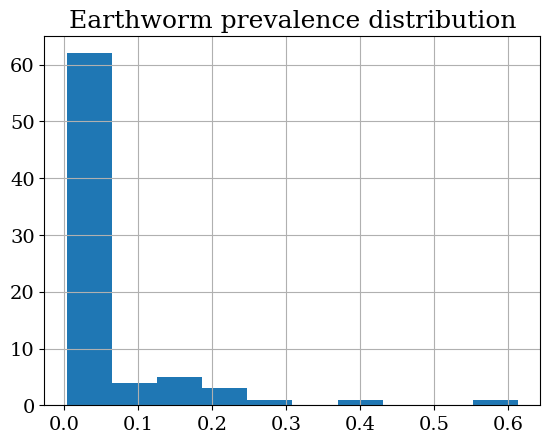

In [44]:
perf_df['Prevalence'].hist()
plt.title('Earthworm prevalence distribution')

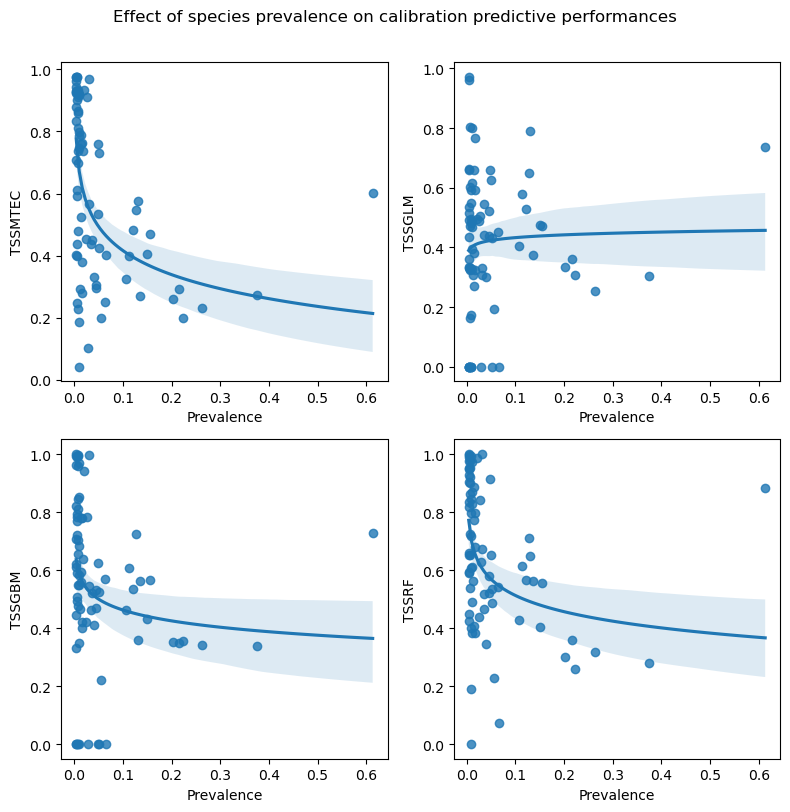

In [19]:
fig, ax = plt.subplots(2,2,figsize=(8,8))
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSMTEC',logx=True,ax=ax[0,0])
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSGLM',logx=True,ax=ax[0,1])
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSGBM',logx=True,ax=ax[1,0])
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSRF',logx=True,ax=ax[1,1])
fig.suptitle('Effect of species prevalence on calibration predictive performances',y=1.01)
fig.tight_layout()

In [ ]:
sns.regplot(data=perf_df.query('TSSMTEC>0'), x='Prevalence', y='TSSMTEC',logx=True)